In [1]:
#Pierce Zhang, CMOR220, Fall 2023, SVD Project
#project_SVD.ipynb
#explanation
#Last Modified: November 14, 2023

In [2]:
# import necessary libraries and set plot sizes
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(15, 10))
import numpy as np

Text(0.5, 1.0, 'Original image')

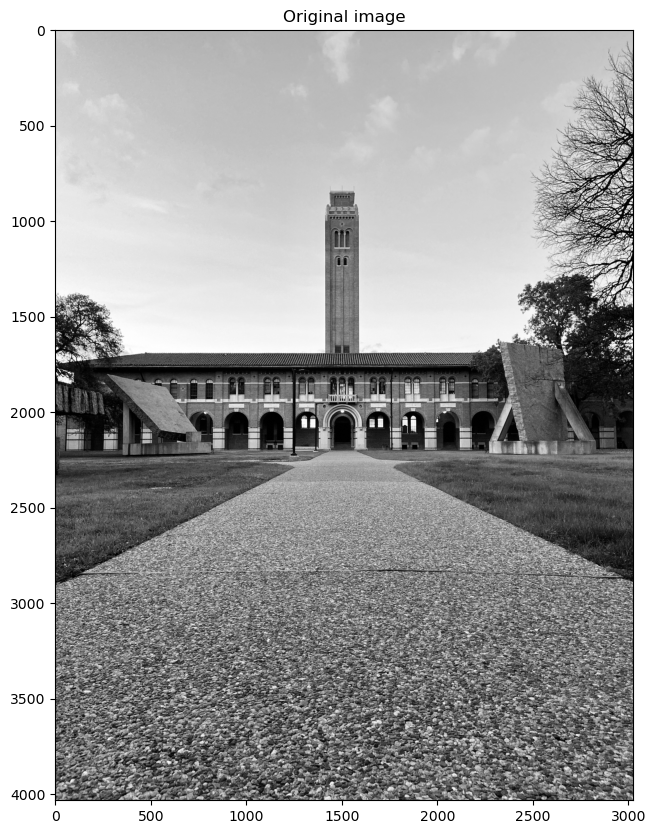

In [3]:
# read .jpg and scale
O = plt.imread('Rice.jpg')/255
plt.imshow(O)
plt.title("Original image")

In [4]:
# compute 2D grayscale image
A = 0.2989 * O[:,:,0] + 0.5870 * O[:,:,1] + 0.1140 * O[:,:,2]

In [5]:
# compute singular decomposition using np.linalg.svd
# Include the full diagonal matrix Dfull
def SVDdecomp(A):
    [U,D,V] = np.linalg.svd(A)
    Dfull = np.zeros((U.shape[1],V.shape[0]))
    D_diag = np.diag(D)
    # use np.diag to fill the diagonal
    if U.shape[1] > V.shape[0]:
        Dfull[0:V.shape[0],0:V.shape[0]] = D_diag
    if U.shape[1] <= V.shape[0]:
        Dfull[0:U.shape[1],0:U.shape[1]] = D_diag
    return U,Dfull,V

In [6]:
#verify the correctness of SVD decomposition. an output of true refers to correctness.
[U,Dfull,V]=SVDdecomp(A)
N = min([U.shape[1],V.shape[0]])
np.allclose(A,U@Dfull@V)

True

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

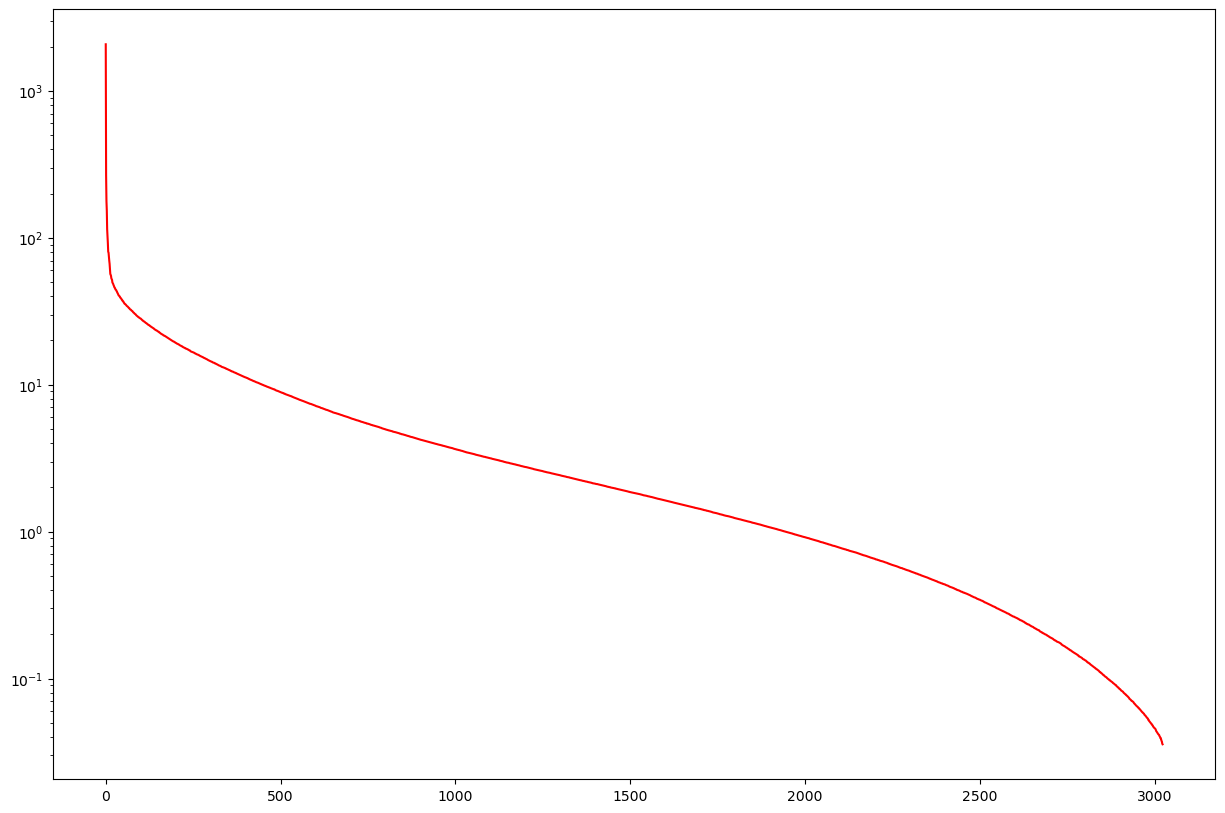

In [7]:
# plot singular values
plt.yscale('log')
plt.plot(np.diag(Dfull),'r')
plt.imshow

In [8]:
# choose a best rank approximation with the error tol
tol = 0.1
# find best rank-r
r = 1
Ar = U[:,0:r]@Dfull[0:r,0:r]@V[0:r,:]
# scans for r in buckets of 10 then backtracks to the bucket right before overshoot
while (r > 0 and np.linalg.norm(A-Ar,"fro")/np.linalg.norm(A,"fro") > tol):
    r += 10
    Ar = U[:,0:r]@Dfull[0:r,0:r]@V[0:r,:]
r -= 10
# scans in increments of 1 until overshoot
while (r > 0 and np.linalg.norm(A-Ar,"fro")/np.linalg.norm(A,"fro") > tol):
    r += 1
    Ar = U[:,0:r]@Dfull[0:r,0:r]@V[0:r,:]

In [9]:
# compute the reduced matrix for the given compressed factor
def compress(A,factor):
    [U,Dfull,V]=SVDdecomp(A)
    r=np.int64(N/factor)
    Ar = U[:,0:r]@Dfull[0:r,0:r]@V[0:r,:]
    return Ar

Text(0.5, 1.0, 'Best Compressed Image with Rank=301, tol=0.1')

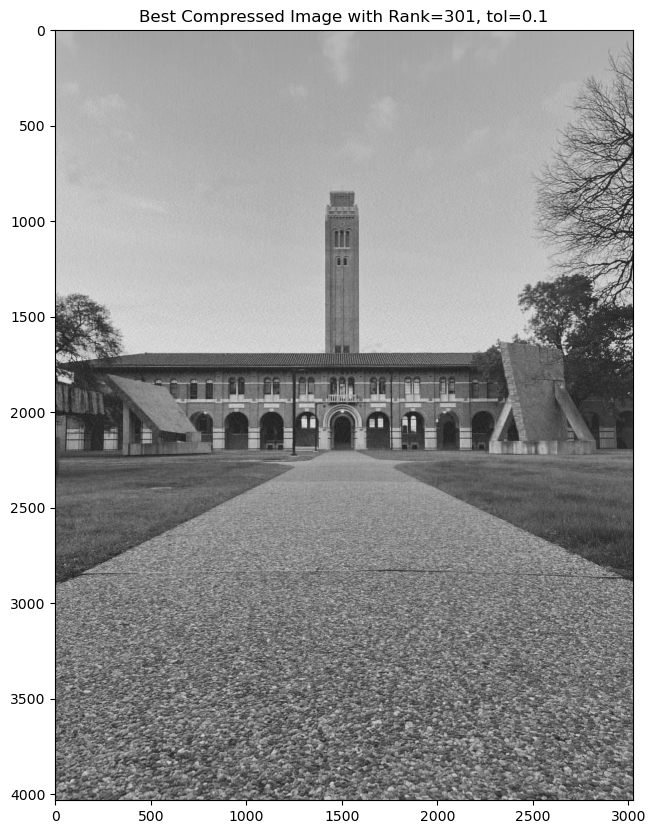

In [10]:
# compute the factor
factor = min([U.shape[1],V.shape[0]])/r
# compute the reduced matrix
[U,Dfull,V]=SVDdecomp(A)
Ar = compress(A,factor)
# plot the reduced matrix
plt.imshow(Ar,cmap='gray')
plt.title(f"Best Compressed Image with Rank={r}, tol={tol}")

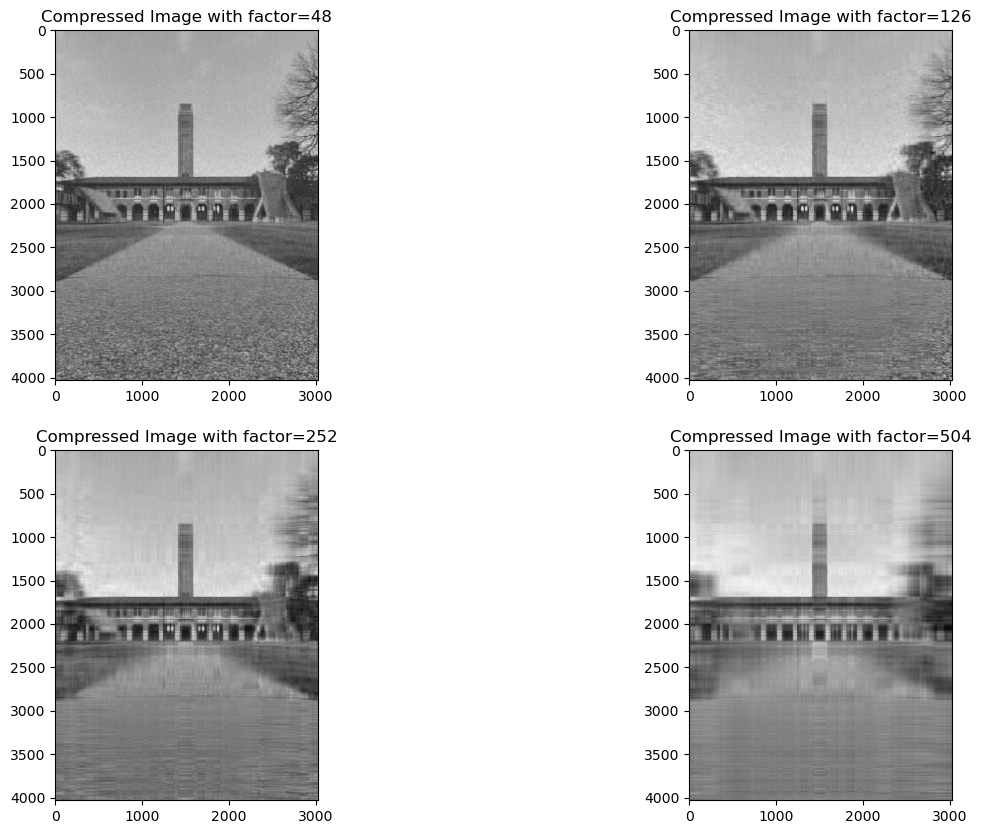

In [11]:
# draw images for different factors using subplots
factors = [48, 126, 252, 504]
for i in range(1,5):
    Ar = compress(A,factors[i-1])
    plt.subplot(2,2,i)
    plt.imshow(Ar,cmap='gray')
    plt.title(f"Compressed Image with factor={factors[i-1]}")